# Publication Visuals

## Style Guide
- plt style ref: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
- TTC figures: https://github.com/wri/sentinel-tree-cover/blob/master/notebooks/visualizations/figures2022.Rmd
  
#### Color Palette
```
'#2fa4e7', // no tree 0
'#fe6742', // monoculture 1
'#72dc68', // agroforestry 2
'#174814'  // natural 3
```

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import sys
import numpy as np
import pandas as pd
sys.path.append('../../src/')
import utils.quick_viz as make
%load_ext autoreload
%autoreload 2

color_dict = {
    'monoculture': '#fe6742',
    'agroforestry': '#72dc68',
    'natural': '#174814',
}

In [24]:
def style_axis(ax, 
               xlabel: str, 
               ylabel: str, 
               xgrid: bool,
               ygrid:bool,
               title: str = None, 
               grid_color: str = '#DDDDDD',
               tick_format: str = None):
    """
    Applies consistent styling to the axes, including labels and gridlines.

    Parameters:
    ax (matplotlib.axes.Axes): The axis to be styled.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    gridlines (bool): Option to add gridlines to the chart background.
    title (str, optional): The title of the chart.
    grid_color (str, optional): The color of the gridlines. Default is '#DDDDDD'.
    """
    # Remove unnecessary spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Style the bottom and left spines
    ax.spines['bottom'].set_color(grid_color)
    ax.spines['left'].set_color(grid_color)
    
    # Set gridlines and axis below the plot elements
    ax.yaxis.grid(ygrid, color=grid_color)
    ax.xaxis.grid(xgrid,color=grid_color)
    ax.set_axisbelow(True)
    
    # Set the axis labels
    ax.set_xlabel(xlabel, labelpad=15)
    ax.set_ylabel(ylabel, labelpad=15)
    if tick_format is not None:
        ax.ticklabel_format(style='plain', axis='y')

    # Optionally set the title
    if title:
        ax.set_title(title, pad=15)

## s2 Histograms
- identify tiles that are largely composed of a single class (each color represents the tile, not the class)
- show all s2 bands?
- key message is to illstrate that there was enough separability between the spectral signatures that it was worth investigating further.

Potential tiles:
-  (1670, 1075), (1659, 1070), 'Agroforestry x Agroforestry' - illustrate two AF plots with quite different signatures, find out what type of agroforestry these were


Monoculture: (1658, 1063), (1658, 1064)  
Natural: (1654, 1065), (1653, 1065), (1658,1072), (1677, 1098)- sparse wetland area in northern pd_east, (1649, 1130)- northern parkland  
Cocoa agroforestry: (1646, 1082), (1648, 1083)
Shea tree: (1660, 1128), (1661, 1128),

### Histogram for Pub

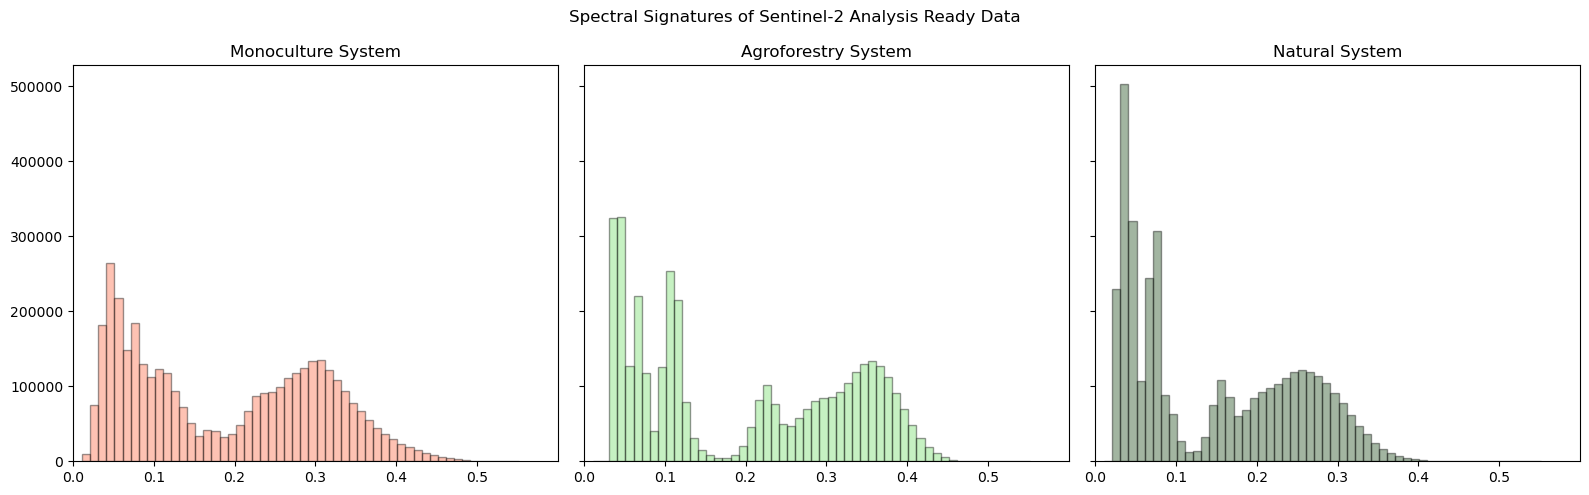

In [10]:
# this one uses cocoa -- this was used for AGU
make.hist_individual_tile('ghana', 
                     (1658, 1064),
                     (1648, 1083), 
                     (1654, 1065), 
                     'Spectral Signatures of Sentinel-2 Analysis Ready Data',
                     color_dict,
                     output_file='../../data/figures/s2_hist_avg.png'
                         )

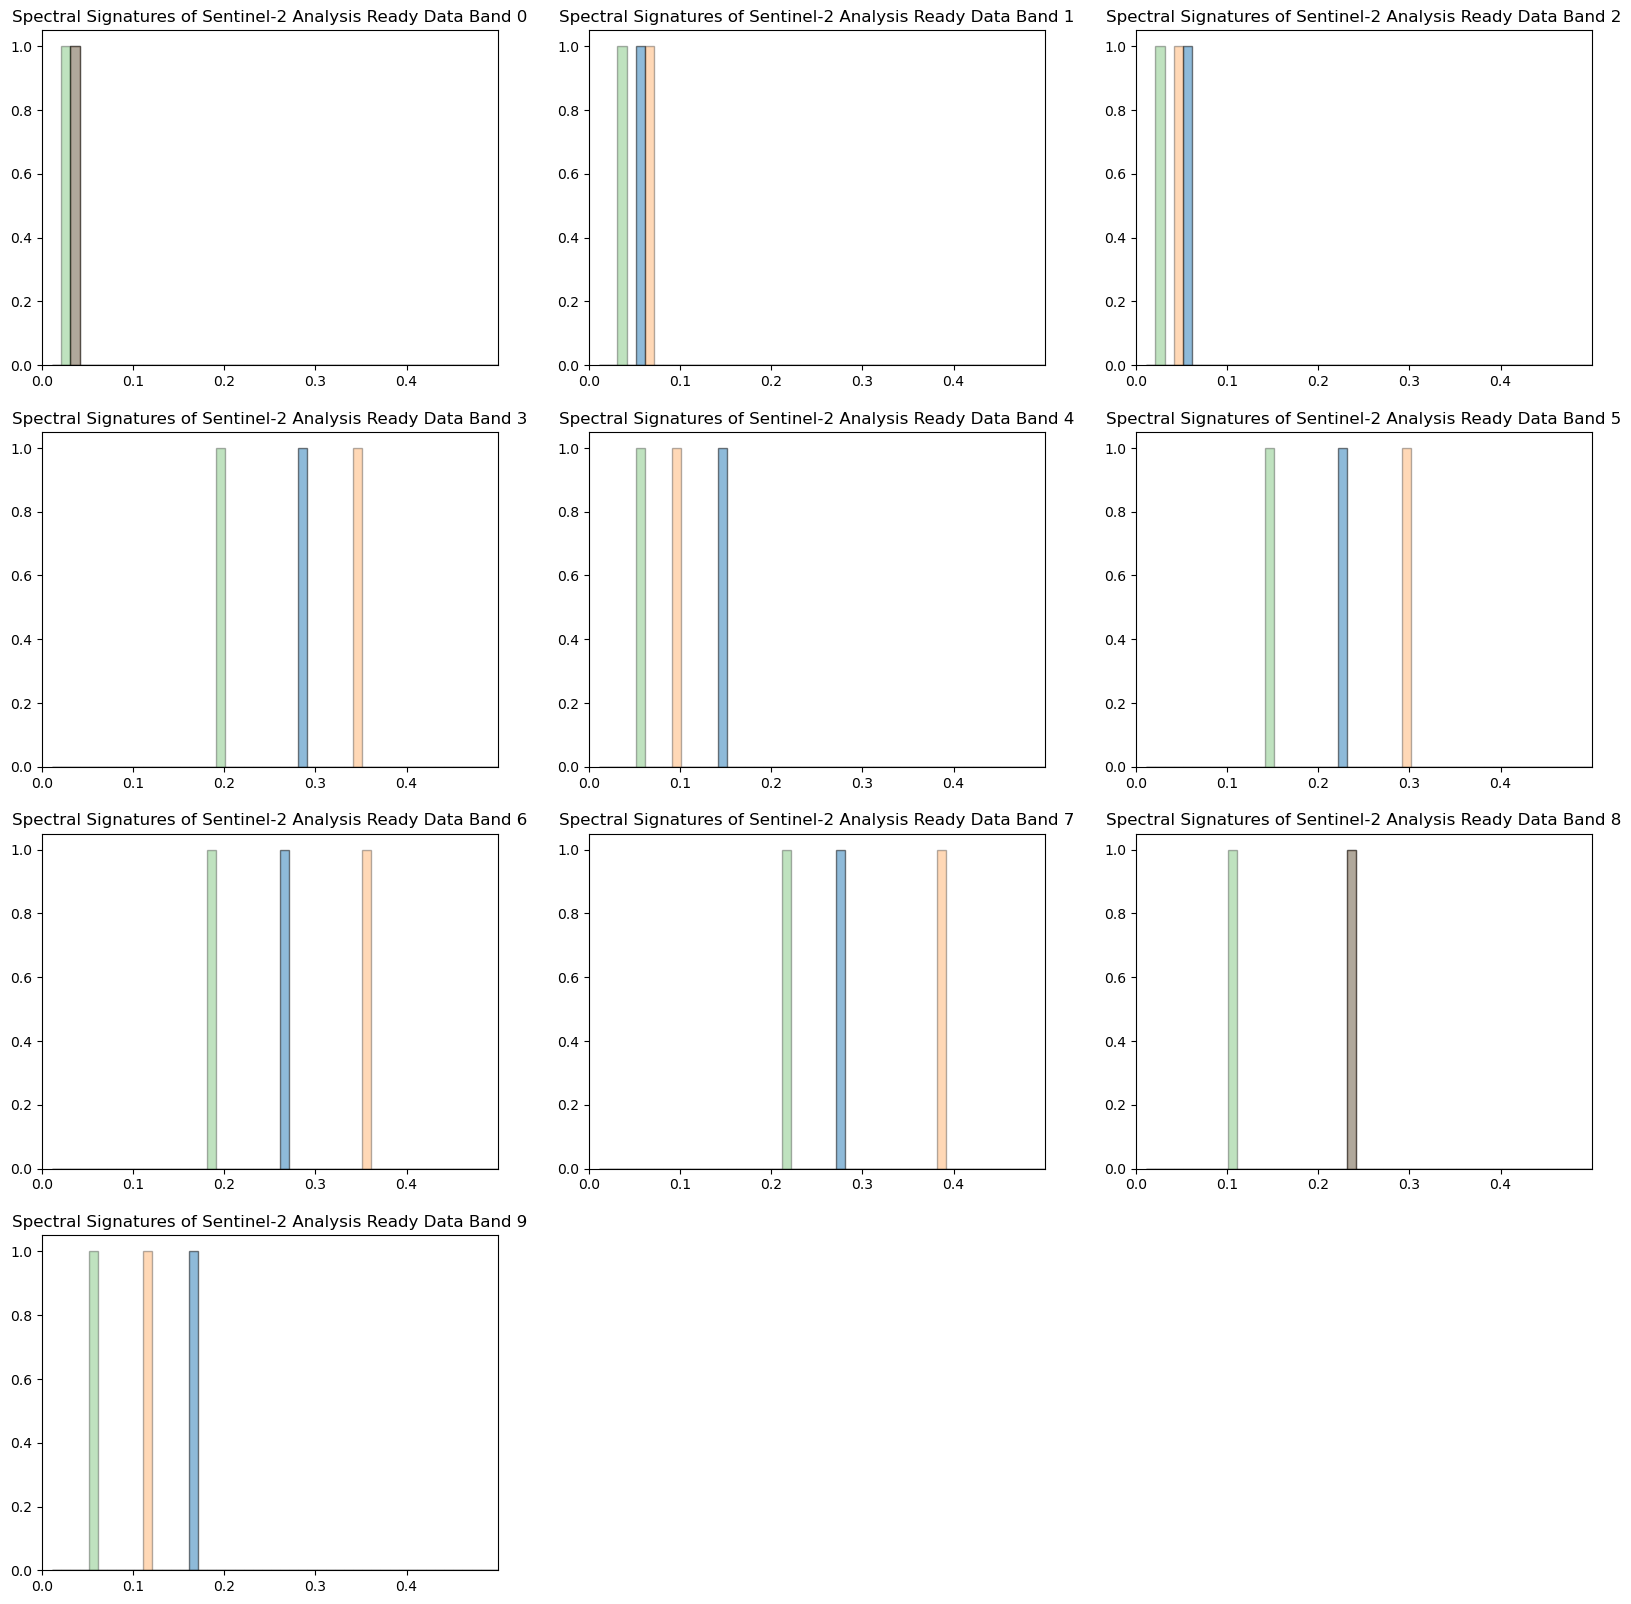

In [9]:
make.hist_compare_s2_byband('ghana', 
                     (1658, 1064),
                     (1648, 1083), 
                     (1654, 1065), 
                     'Spectral Signatures of Sentinel-2 Analysis Ready Data',
                      color_dict);   

In [ ]:
## Create a plot for two histograms that illustrate how two agroforestry systems differ?? shea vs cocoa 

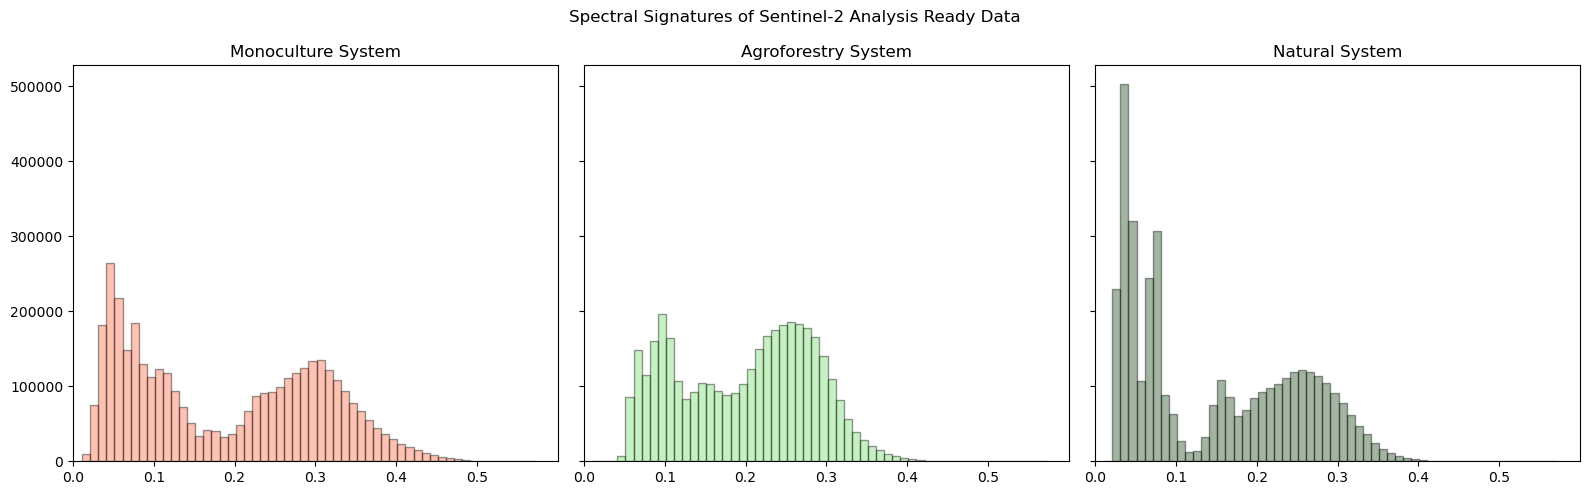

In [32]:
# this one uses shea
make.hist_individual_tile('ghana', 
                     (1658, 1064),
                     (1660, 1128), 
                     (1654, 1065), 
                     'Spectral Signatures of Sentinel-2 Analysis Ready Data',
                      color_dict)

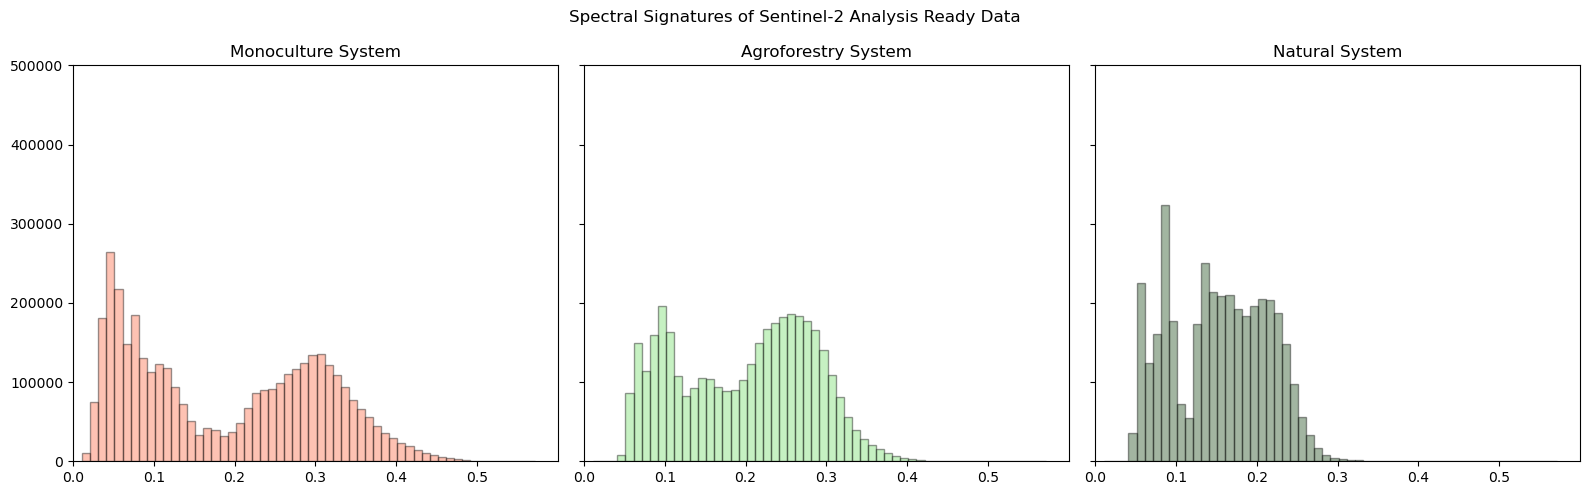

In [38]:
# this one looks at natural parkland system -- much more similar to shea
make.hist_individual_tile('ghana', 
                     (1658, 1064),
                     (1660, 1128), 
                     (1649, 1130), 
                     'Spectral Signatures of Sentinel-2 Analysis Ready Data',
                      color_dict)


## Other experiments

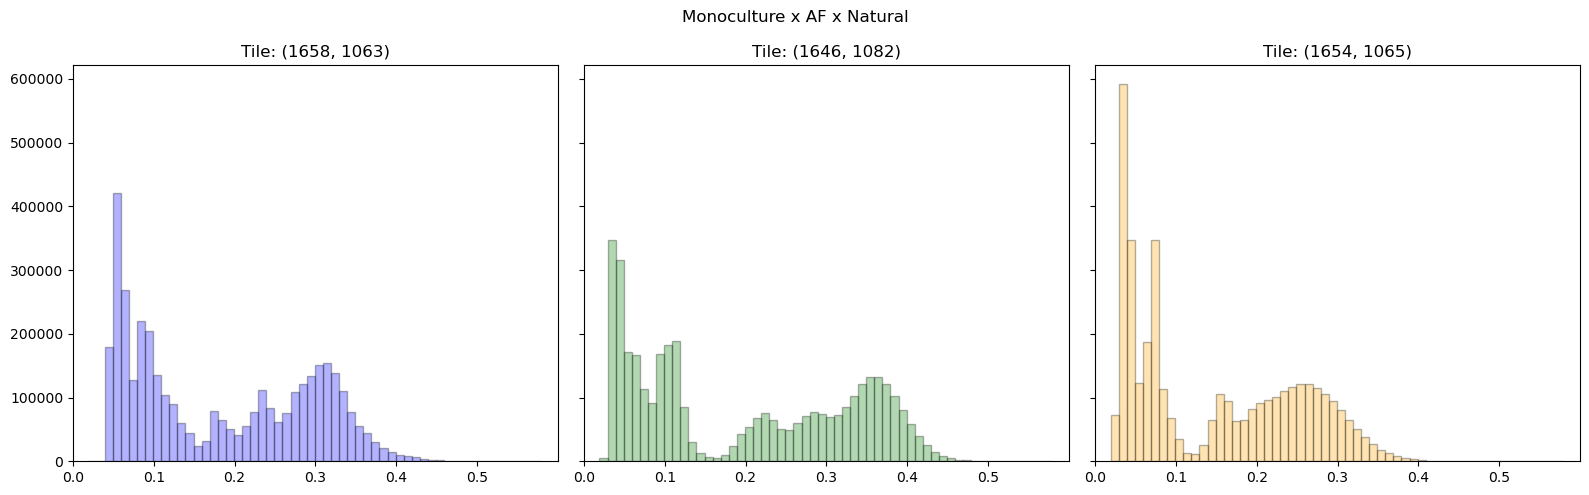

In [21]:
make.hist_individual_tile('ghana', 
                     (1658, 1063),
                     (1646, 1082), 
                     (1654, 1065), 
                     'Monoculture x AF x Natural')

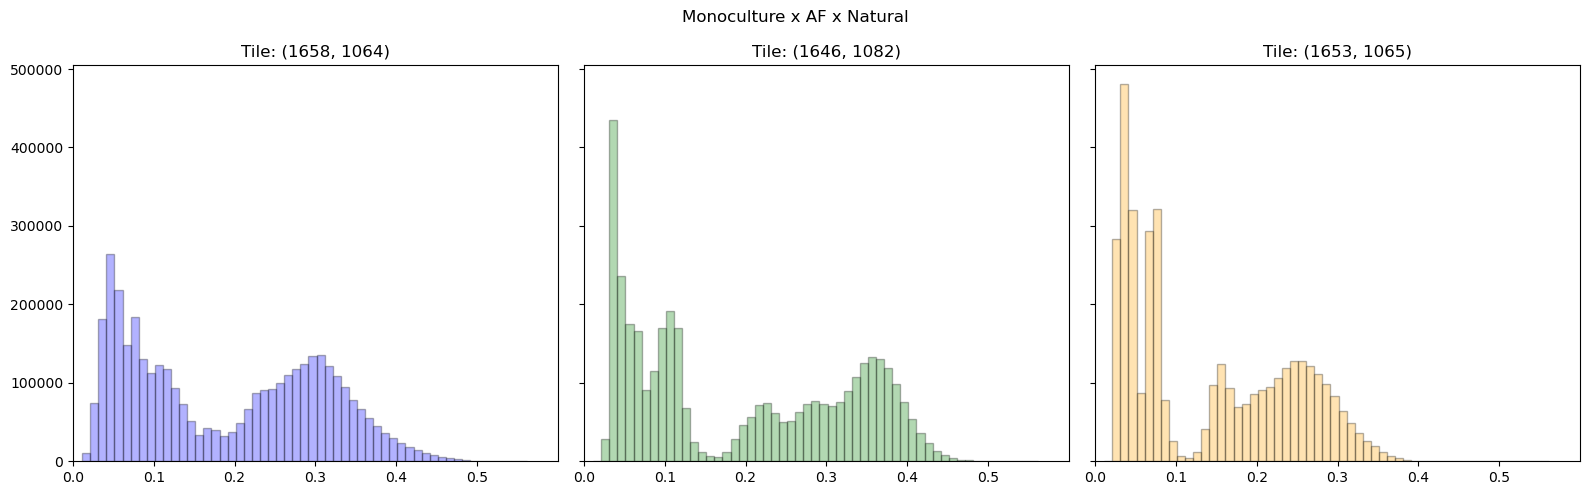

In [17]:
#This monoculture is better, but natural is worse (includes more AF system)
make.hist_individual_tile('ghana', 
                     (1658, 1064),
                     (1646, 1082), 
                     (1653, 1065), 
                     'Monoculture x AF x Natural')

## Stacked Barchart

In [27]:
def stacked_bar(df: pd.DataFrame, 
                title: str,
                color_dict: dict,
                categories: list,
                output_file: str = None,
                dpi: int = 300
               ):
    """
    Creates a stacked bar chart showing the total area in hectares for different tree cover classes per district.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    title (str): Title of the chart.
    color_dict (dict): Dictionary mapping classes to colors.
    categories (list): List of land use class columns to include in the stacked bar.

    """
    fig, ax = plt.subplots(figsize=(12, 8))

    # Initialize the bottom for stacking
    bottom = np.zeros(len(df))

    # Plot each category
    for category in categories:
        ax.bar(
            df.district, 
            df[category], 
            bottom=bottom, 
            label=category, 
            color=color_dict.get(category, "#cccccc"),
        )
        bottom += df[category].values

    # Style the chart
    style_axis(
        ax=ax,
        xlabel="District",
        ylabel="Total Area (ha)",
        title=title,
        gridlines=True
    )

    # Rotate x-axis labels for readability
    ax.set_xticklabels(df.district, rotation=55, ha="right")
    ax.legend(title="System", loc="upper left", bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    if output_file:
        plt.savefig(output_file, dpi=dpi, bbox_inches='tight')
    plt.show()

/var/folders/1v/8qs7l7157sddx1_9z9wqldrc0000gp/T/ipykernel_94034/3802395651.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.district, rotation=55, ha="right")


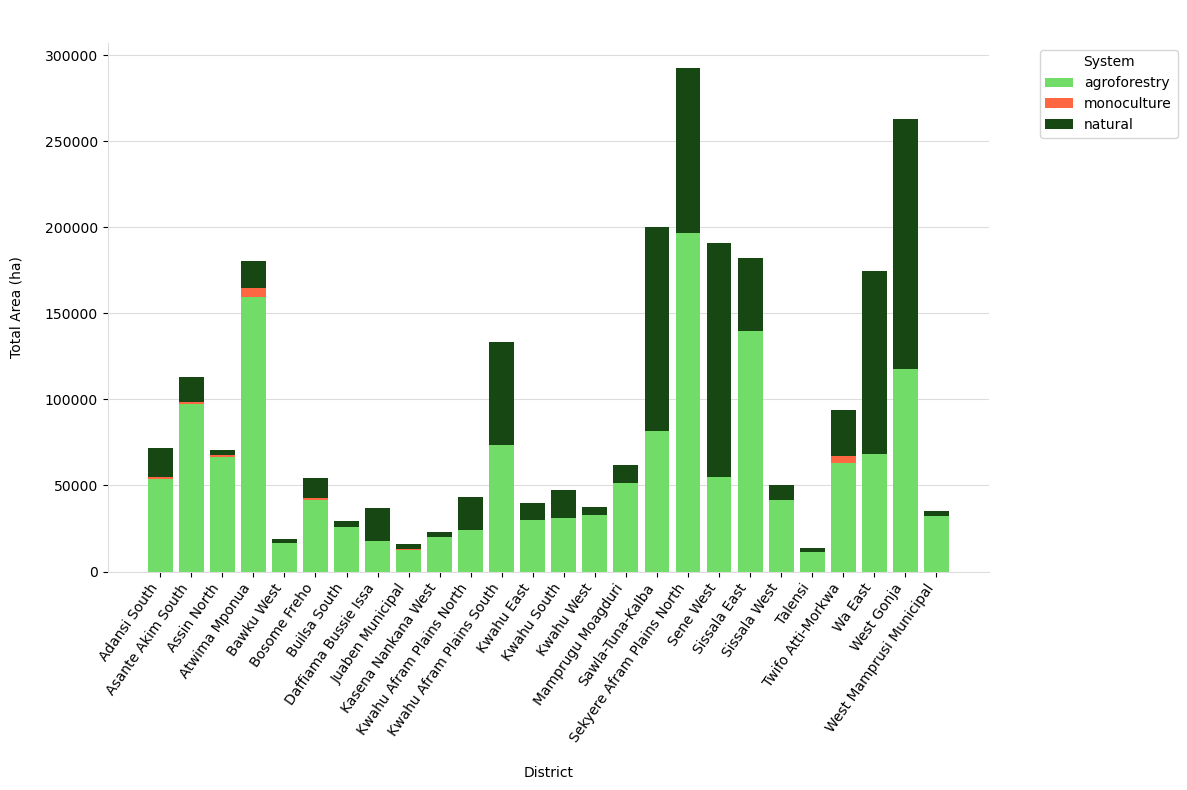

In [29]:
df = pd.read_csv('../../data/area_assessment.csv')

categories = ['agroforestry', 'monoculture', 'natural']

# Generate the plot
stacked_bar(
    df=df.drop(columns=['no_data']),  # Exclude no_data column
    title=" ",
    color_dict=color_dict,
    categories=categories,
    output_file='../../data/figures/stacked_bar.png'
)

In [31]:
df = pd.read_csv('../../data/area_assessment.csv')
df.sum()

no_tree                                                2773362.62
monoculture                                              13906.04
agroforestry                                            1562541.5
natural                                                 897522.66
no_data                                                4646938.74
district        Adansi SouthAsante Akim SouthAssin NorthAtwima...
dtype: object

In [27]:
def horizontal_stacked_bar(df: pd.DataFrame, 
                           title: str,
                           color_dict: dict,
                           categories: list,
                           output_file: str = None,
                           dpi: int = 300):
    """
    Creates a horizontal 100% stacked bar chart showing the percentage 
    area for different tree cover classes per district.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    title (str): Title of the chart.
    color_dict (dict): Dictionary mapping classes to colors.
    categories (list): List of land use class columns to include in the stacked bar.
    output_file (str): File path to save the chart (optional).
    dpi (int): Resolution for the saved chart.
    """
    # Normalize the data to percentages
    df[categories] = df[categories].div(df[categories].sum(axis=1), axis=0) * 100

    fig, ax = plt.subplots(figsize=(8,8))

    # Initialize the left position for stacking
    left = np.zeros(len(df))

    # Plot each category as a horizontal bar
    for category in categories:
        ax.barh(
            df.district, 
            df[category], 
            left=left, 
            label=category, 
            color=color_dict.get(category, "#cccccc"),
            # alpha=0.4
        )
        left += df[category].values


    # Style the chart
    style_axis(
        ax=ax,
        xlabel="Percentage Area (%)",
        ylabel=" ",
        title=title,
        xgrid=True,
        ygrid=False
    )
    ax.set_xlim(0, 100)
    ax.legend(title="System", loc="upper left", bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    if output_file:
        plt.savefig(output_file, dpi=dpi, bbox_inches='tight')
    plt.show()


/var/folders/1v/8qs7l7157sddx1_9z9wqldrc0000gp/T/ipykernel_6372/1999014718.py:29: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.yaxis.grid(ygrid, color=grid_color)


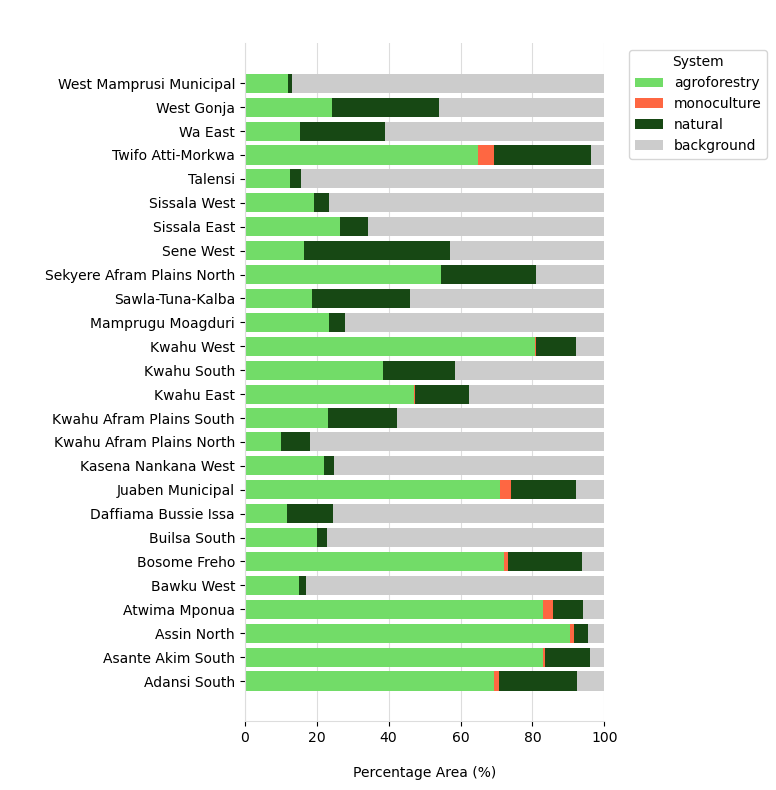

In [29]:
df = pd.read_csv('../../data/area_assessment.csv')
df = df.rename(columns={'no_tree':'background'})

categories = ['agroforestry', 'monoculture', 'natural', 'background']

# Generate the plot
horizontal_stacked_bar(
    df=df.drop(columns=['no_data']),  # Exclude no_data column
    title=" ",
    color_dict=color_dict,
    categories=categories,
    output_file='../../data/figures/h_stacked_bar.png'
)

In [4]:
df = pd.read_csv('../../data/area_assessment.csv')

## Learning Curve

In [5]:
## need to figure out how to create inputs in order to run this
# import create_xy from src/features 
# includes texture 78: is texture
df = pd.read_csv('../../data/cleanlab/cleanlab_demo3.csv')

X_train_full = df.iloc[:179728, 0:78]
X_train_drop_ttc = df.iloc[:179728, 0:13]
y_train = df.iloc[:179728, -1:]
X_train_full.shape, X_train_drop_ttc.shape, y_train.shape

((179728, 78), (179728, 13), (179728, 1))

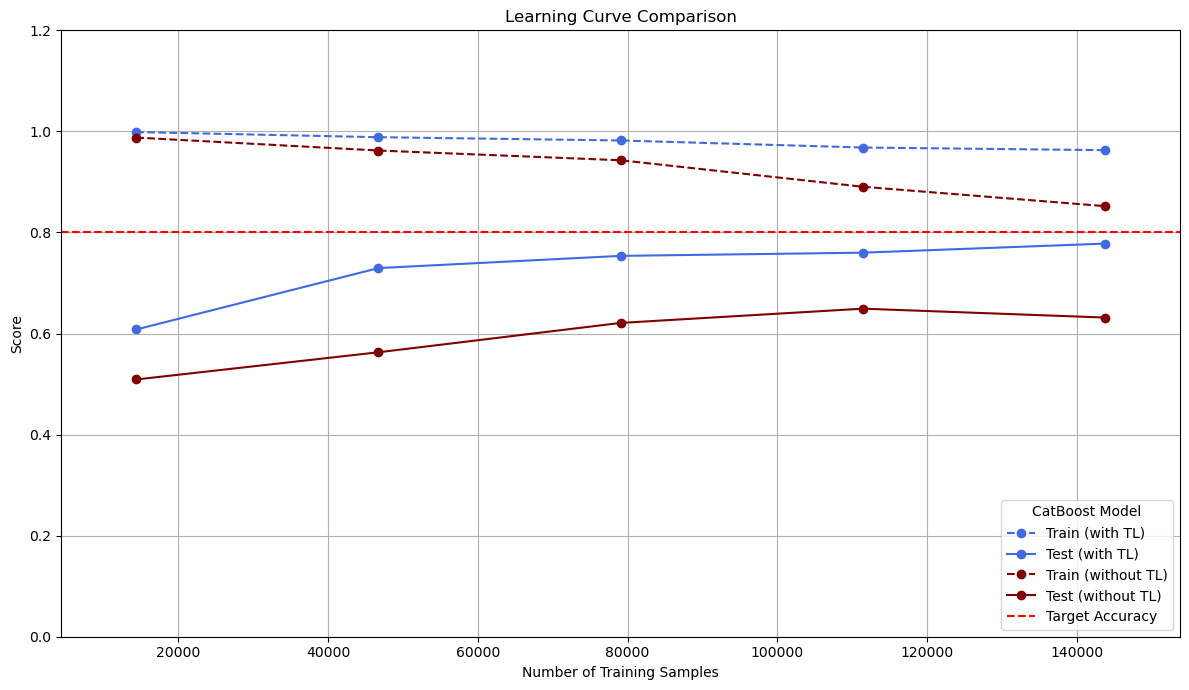

<Figure size 640x480 with 0 Axes>

In [8]:
make.learning_curve_catboost(X_train_full,
                            X_train_drop_ttc,
                            y_train,
                            output_file='../../data/figures/learning_curve.png')

## AUC ROC
Doesnt support multiclass so would have to find some workaround.

In [14]:
df = pd.read_csv('../../data/cleanlab/cleanlab_demo3.csv')

In [18]:
X_train_full = df.iloc[:, 0:78]
X_train_drop_ttc = df.iloc[:, 0:13]
y_train_full = df.iloc[:, -1:]
print(X_train_full.shape, X_train_drop_ttc.shape, y_train.shape)

X_train_all, X_test_all, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
X_train_dropped, X_test_dropped, _, _ = train_test_split(X_train_drop_ttc, y_train_full, test_size=0.2, random_state=42)

# Call the function
#make.roc_auc_curve_catboost(X_train_all, X_train_dropped, X_test_all, y_train, y_test)

(189728, 78) (189728, 13) (151782, 1)


## Legacy

In [39]:
# abirem in blue, pd_southeast in orange
#make.hist_compare_s2('ghana', (1668, 1076), (1658, 1063), 'Monoculture x Monoculture (oil)');

In [3]:
#make.hist_compare_s2_byband('ghana', (1668, 1076), (1658, 1063), 'Monoculture x Monoculture');

In [46]:
#make.hist_compare_s2('ghana', (1668, 1075), (1662, 1073), 'Natural x Natural');

In [37]:
#make.hist_compare_s2_byband('ghana', (1668, 1075), (1662, 1073), 'Natural x Natural');

In [47]:
#make.hist_compare_s2('ghana', (1668, 1075), (1653, 1065), 'Natural x Natural');

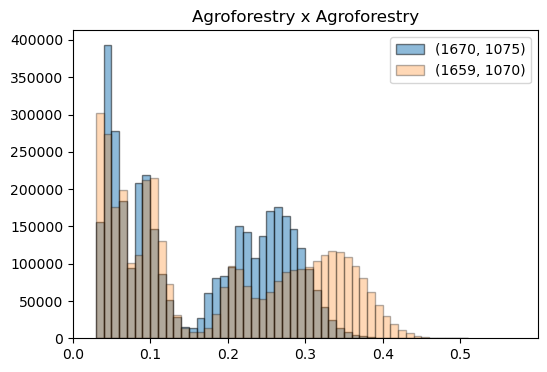

In [14]:
make.hist_compare_s2('ghana', (1670, 1075), (1659, 1070), 'Agroforestry x Agroforestry');

In [36]:
#make.hist_compare_s2_byband('ghana', (1670, 1075), (1659, 1070), 'Agroforestry x Agroforestry');

In [45]:
# the tile for abirem is agroforestry w some smallholder oil palm
# the tile for pd_southeast is a natural forest misclassified as agroforestry
#make.hist_compare_s2('ghana', (1668, 1075), (1661, 1074), 'Agroforestry x Predicted Agroforestry');

In [35]:
#make.hist_compare_s2_byband('ghana', (1668, 1075), (1661, 1074), 'Agroforestry x Predicted Agroforestry');

In [44]:
#make.hist_compare_s2('ghana', (1668, 1074), (1670, 1074), 'Natural x Agroforestry, Abirem');

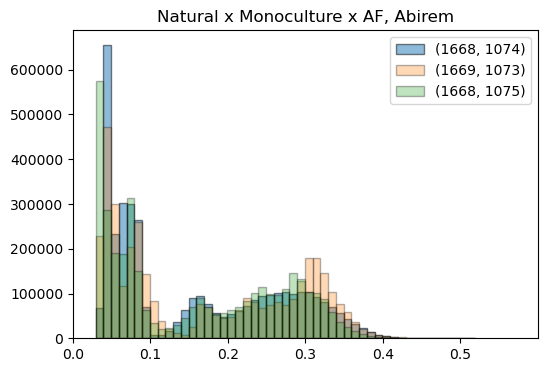

In [3]:
make.hist_compare_s2('ghana', (1668, 1074), (1669, 1073), 'Natural x Monoculture x AF, Abirem', (1668, 1075));

In [42]:
#make.hist_compare_s2_byband('ghana', (1668, 1074), (1669, 1073), 'Natural x Monoculture x AF, Abirem', (1668, 1075));

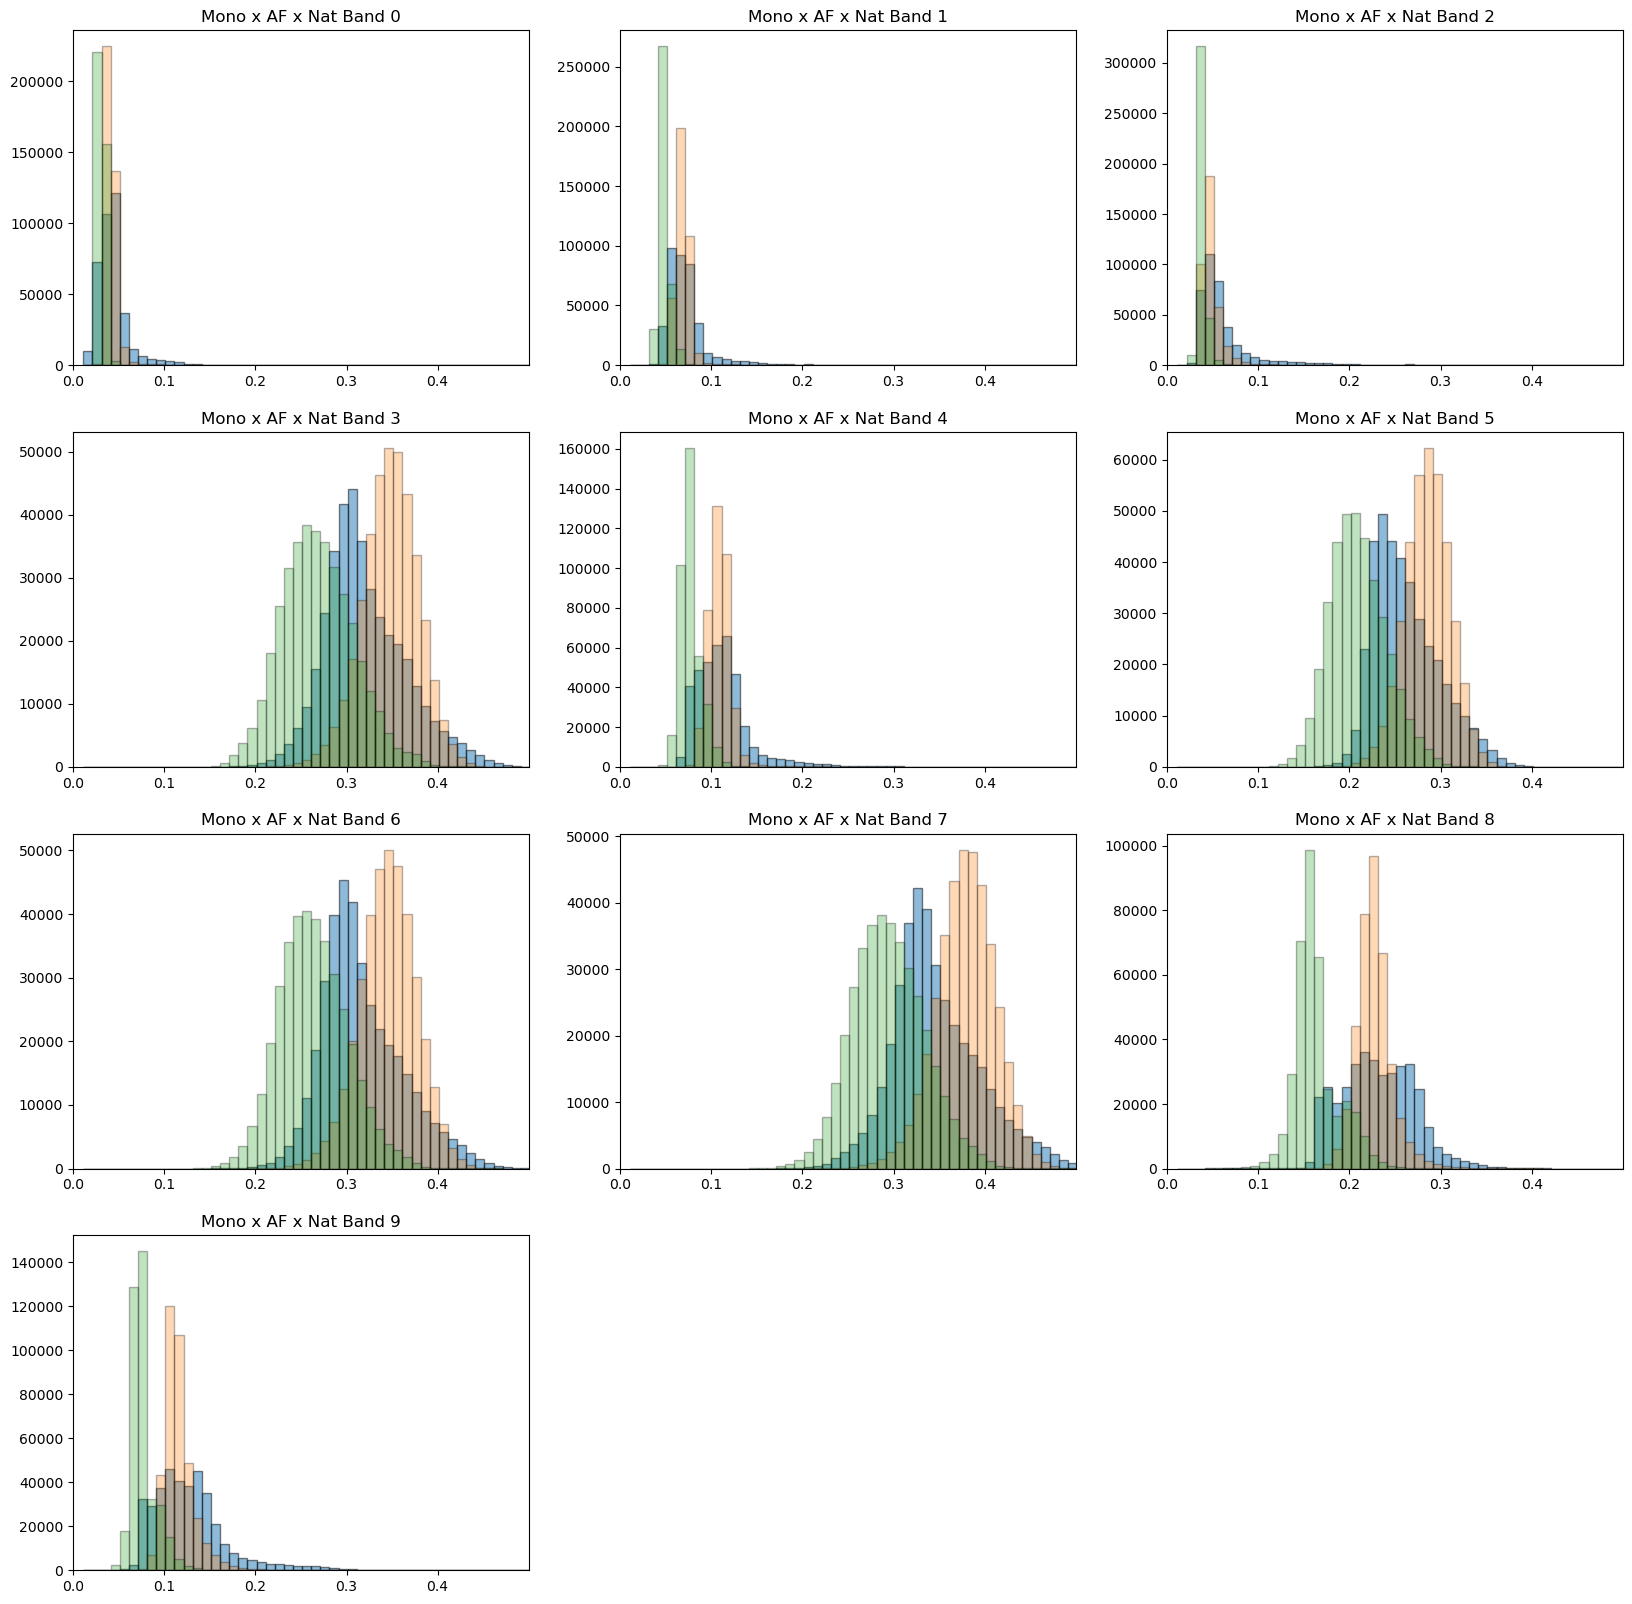

In [5]:
# (1658, 1064),
# (1648, 1083), 
# (1654, 1065)

make.hist_compare_s2_byband('ghana', (1658, 1064), (1648, 1083), 'Mono x AF x Nat', (1654, 1065));   

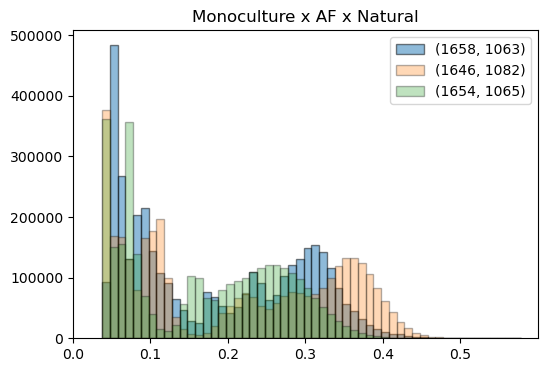

In [3]:
make.hist_compare_s2('ghana', 
                     (1658, 1063), # Mono
                     (1646, 1082), # AF
                     'Monoculture x AF x Natural', 
                     (1654, 1065));   # Nat